In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.cross_decomposition import PLSRegression

## Data Processing

In [7]:
descriptors = pd.read_csv('./descriptors.csv', delimiter = ';')
descriptors = descriptors.drop(descriptors.columns[0],axis=1)
descriptors 

,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,52.0,29.0,35.333332,11.111111,23.0,46.0,90.0,44.0,70.000000,16.000000,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,148.33333,56.222220,64.0
1,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
3,33.0,2.0,32.000000,1.000000,31.0,74.0,84.0,10.0,79.000000,5.000000,...,0.0,0.0,0.0,0.0,64.0,166.0,102.0,115.00000,51.000000,64.0
4,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2527,56.0,25.0,40.666668,10.222222,31.0,9.0,95.0,86.0,59.333332,33.555557,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,119.00000,73.333336,64.0
2528,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2529,33.0,2.0,32.000000,1.000000,31.0,74.0,84.0,10.0,79.000000,5.000000,...,0.0,0.0,0.0,0.0,64.0,166.0,102.0,115.00000,51.000000,64.0


In [8]:
dataset = pd.read_csv('dataset.csv', delimiter = ';')
band_gaps = dataset["band_gap_vals"]
band_gaps

0       0.088699
1       1.447379
2       1.496388
3       0.544622
4       1.440079
          ...   
2526    1.653516
2527    0.000000
2528    1.232222
2529    0.302066
2530    1.231642
Name: band_gap_vals, Length: 2531, dtype: float64

In [9]:
# set the X and y training data

X = descriptors
y = band_gaps

## Linear Regression without Scaling the Data

In [10]:
# perform train/test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=42)

In [11]:
# fit the model
model = LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

In [12]:
# obtain the y prediction data
y1_pred = model.predict(X1_test)
y1_pred

array([ 3.83122925e-01,  1.45588486e+00,  3.83122925e-01,  1.76121634e+00,
        1.45588486e+00,  3.83122925e-01,  1.45588486e+00,  1.99364138e-01,
        3.83122925e-01,  1.45588486e+00,  1.45588486e+00,  3.83122925e-01,
        1.45588486e+00,  1.45588486e+00,  1.45588486e+00,  1.45588486e+00,
        1.45588486e+00,  1.45588486e+00,  3.83122925e-01,  1.45588486e+00,
        3.83122925e-01,  1.45588486e+00,  1.45588486e+00,  1.45588486e+00,
       -8.80256593e-02,  1.45588486e+00,  3.83122925e-01,  1.45588486e+00,
        1.45588486e+00,  1.45588486e+00,  1.45588486e+00,  3.83122925e-01,
        1.45588486e+00,  1.45588486e+00,  3.83122925e-01,  1.45588486e+00,
        1.45588486e+00,  6.28092832e-01, -2.56162405e-01,  1.45588486e+00,
        1.45588486e+00,  3.83122925e-01,  3.83122925e-01,  1.45588486e+00,
        3.83122925e-01,  3.83122925e-01,  1.45588486e+00,  3.83122925e-01,
       -7.22373575e-02,  3.83122925e-01,  5.73145697e-01,  1.45588486e+00,
        4.76880207e-01,  

In [13]:
# obtain the metrics for evaluating prediction accuracy
MAE = mean_absolute_error(y1_pred,y1_test)
MSE = mean_squared_error(y1_pred,y1_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.2207929516175434
0.14169531033006966
0.3764243753133817


In [14]:
# obtain the coefficients for all features
model.coef_

array([-2.89398590e-01,  2.33248513e-01,  6.98807045e-01, -1.46245437e-01,
       -3.15070656e-02,  1.72266650e+07, -1.72266650e+07,  1.72266650e+07,
       -4.01812028e-03,  4.13264336e-02,  2.34869242e-02, -1.84664224e+04,
        1.84665188e+04, -1.84665055e+04, -1.93515512e-01,  4.74101147e-02,
        2.02785041e-02, -6.55360228e+08,  6.55360228e+08, -6.55360228e+08,
        1.14130601e-03,  1.04350969e-04, -7.20776618e-04,  1.00356858e+06,
       -9.46209774e+05,  1.00356836e+06, -8.97653354e-02,  1.70586896e-01,
       -1.45375911e-01,  6.40107275e+04, -6.40092561e+04,  6.40094137e+04,
       -3.99027162e+00,  3.52501871e-01, -3.02242260e-01,  1.03016354e+07,
       -1.03016354e+07,  1.03016354e+07, -1.67800763e-02, -7.55925020e-02,
        8.63095606e-03,  1.16296000e+05, -1.16296442e+05,  1.16297240e+05,
       -7.68189145e-01, -1.18506135e+00,  1.17893440e+00, -4.82548061e+04,
       -1.43150542e+04, -4.82564198e+04,  1.10838234e+05,  2.96397965e+00,
        5.36913295e-01,  

In [15]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
MagpieData maximum MeltingT,6.553602e+08
MagpieData range MendeleevNumber,1.722667e+07
MagpieData minimum MendeleevNumber,1.722667e+07
MagpieData range CovalentRadius,1.030164e+07
MagpieData minimum CovalentRadius,1.030164e+07
MagpieData maximum NValence,2.211015e+06
MagpieData maximum SpaceGroupNumber,2.086889e+06
MagpieData minimum Column,1.003569e+06
MagpieData range Column,1.003568e+06
MagpieData range NdValence,4.372442e+05


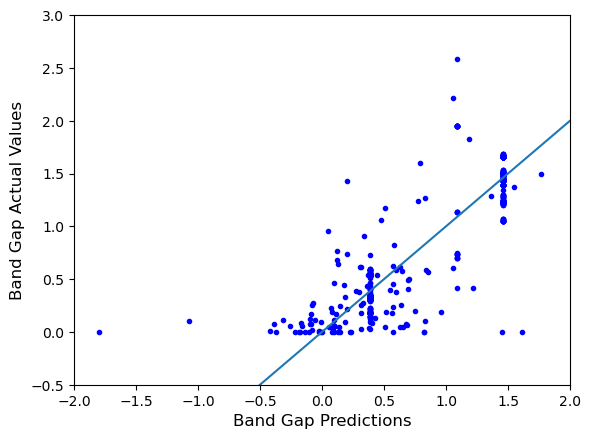

In [16]:
# plot the predicted values against the actual values
plt.plot(y1_pred,y1_test, 'b.')
plt.xlabel('Band Gap Predictions', fontsize = 12)
plt.ylabel('Band Gap Actual Values', rotation = 'vertical', fontsize = 12)
plt.axis([-2, 2, -0.5,3])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

In [17]:
# 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.06


## Linear Regression with Scaled Data

In [30]:
scaler = StandardScaler()      
X_sd = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_sd, columns = X.columns)

In [31]:
# perform train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled, y, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X2_train_df,y2_train)

LinearRegression()

In [33]:
y2_pred = model.predict(X2_test_df)    # obtain the y prediction data
y2_pred

array([ 0.38997452,  1.45468739,  0.38997452,  1.74592295,  1.45468739,
        0.38997452,  1.45468739,  0.17092832,  0.38997452,  1.45468739,
        1.45468739,  0.38997452,  1.45468739,  1.45468739,  1.45468739,
        1.45468739,  1.45468739,  1.45468739,  0.38997452,  1.45468739,
        0.38997452,  1.45468739,  1.45468739,  1.45468739, -0.14369927,
        1.45468739,  0.38997452,  1.45468739,  1.45468739,  1.45468739,
        1.45468739,  0.38997452,  1.45468739,  1.45468739,  0.38997452,
        1.45468739,  1.45468739,  0.59778601, -0.35587604,  1.45468739,
        1.45468739,  0.38997452,  0.38997452,  1.45468739,  0.38997452,
        0.38997452,  1.45468739,  0.38997452, -0.06845768,  0.38997452,
        0.54743575,  1.45468739,  0.45824089,  1.45468739,  0.18157497,
        0.35060514,  1.45468739,  0.48184129,  1.45468739,  0.38997452,
        1.45468739,  1.45468739, -0.34484536,  1.45468739,  1.45468739,
        1.45468739,  1.45468739,  1.45468739,  1.09720371,  1.45

In [34]:
MAE = mean_absolute_error(y2_pred,y2_test)
MSE = mean_squared_error(y2_pred,y2_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.22098603179753573
0.14097094161773616
0.37546097216320123


In [35]:
model.coef_     # obtain the coefficients for all features

array([-3.49545191e+00,  3.07004916e+00,  5.61115314e+00, -7.86918020e-01,
       -5.45726552e-01, -1.52330309e+12,  3.26435809e+11, -1.51309221e+12,
       -4.36082975e-02,  3.18183899e-01,  3.71582031e-01, -3.85175057e+05,
        6.06935379e+05, -6.43319426e+05, -4.10393524e+00,  6.66320801e-01,
        7.29827881e-01,  1.64042191e+11, -1.76790552e+12,  1.78063796e+12,
        3.62854004e-01,  8.49914551e-03, -2.07462311e-01, -1.83648429e+12,
       -3.09917437e+12, -1.78341639e+12, -2.15057373e-01,  1.81236267e-01,
       -4.45220947e-01, -2.16702815e+11,  1.97582181e+11, -2.69634876e+11,
       -1.75624847e+00,  1.10656738e-01, -2.14248657e-01,  5.63264735e+11,
       -8.42636383e+11,  9.92743993e+11, -2.29339600e-01, -7.07496643e-01,
        1.89865112e-01,  1.38473370e+12, -2.18503305e+12,  2.67081211e+12,
       -2.03186035e-01, -2.20825195e-01,  6.02050781e-01,  5.78625252e+11,
        7.79525801e+09,  5.78625252e+11,  1.49490368e+04,  4.38552856e-01,
        1.51710510e-01,  

In [36]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
MagpieData range Electronegativity,2.670812e+12
MagpieData range NpValence,2.146349e+12
MagpieData range MeltingT,1.780638e+12
MagpieData maximum NpValence,1.513120e+12
MagpieData minimum Electronegativity,1.384734e+12
MagpieData range CovalentRadius,9.927440e+11
MagpieData minimum NpValence,9.885203e+11
MagpieData maximum NUnfilled,8.982064e+11
MagpieData range NValence,7.522587e+11
MagpieData minimum NValence,7.213647e+11


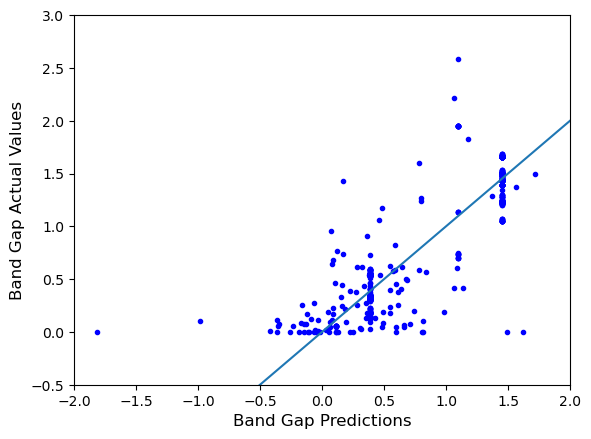

In [37]:
plt.plot(y2_pred,y2_test, 'b.')
plt.xlabel('Band Gap Predictions', fontsize = 12)
plt.ylabel('Band Gap Actual Values', rotation = 'vertical', fontsize = 12)
plt.axis([-2, 2, -0.5,3])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

In [39]:
# 5-fold cross validation
scores = cross_val_score(model, X_scaled, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.06


## Linear Regression on the dimensionality-reduced scaled data from PCA

In [5]:
X_pca = np.genfromtxt('./PC2.csv', delimiter = ',')
X_pca

array([[ 9.41600838, -1.54215514],
       [-3.44540133,  2.40395945],
       [-3.44540133,  2.40395945],
       ...,
       [-3.44540133,  2.40395945],
       [-2.26965159, -6.06014311],
       [-3.44540133,  2.40395945]])

In [10]:
# perform train/test split
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)

In [11]:
# fit the model
model = LinearRegression()
model.fit(X_pca_train,y_train)

LinearRegression()

In [12]:
# obtain the y prediction data
y_pred = model.predict(X_pca_test)
y_pred

array([ 0.47216519,  1.31333846,  0.47216519,  1.7908859 ,  1.31333846,
        0.47216519,  1.31333846,  0.58002663,  0.47216519,  1.31333846,
        1.31333846,  0.47216519,  1.31333846,  1.31333846,  1.31333846,
        1.31333846,  1.31333846,  1.31333846,  0.47216519,  1.31333846,
        0.47216519,  1.31333846,  1.31333846,  1.31333846,  0.80446163,
        1.31333846,  0.47216519,  1.31333846,  1.31333846,  1.31333846,
        1.31333846,  0.47216519,  1.31333846,  1.31333846,  0.47216519,
        1.31333846,  1.31333846,  1.0534016 ,  0.12430166,  1.31333846,
        1.31333846,  0.47216519,  0.47216519,  1.31333846,  0.47216519,
        0.47216519,  1.31333846,  0.47216519,  0.3289772 ,  0.47216519,
       -0.01077017,  1.31333846,  0.75637619,  1.31333846,  1.09626901,
       -0.11348777,  1.31333846,  0.43813911,  1.31333846,  0.47216519,
        1.31333846,  1.31333846, -0.26087462,  1.31333846,  1.31333846,
        1.31333846,  1.31333846,  1.31333846,  1.83102681,  1.31

In [13]:
# obtain the metrics for evaluating prediction accuracy
MAE = mean_absolute_error(y_pred,y_test)
MSE = mean_squared_error(y_pred,y_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.2849453642039897
0.20891391711268198
0.45707101976900916


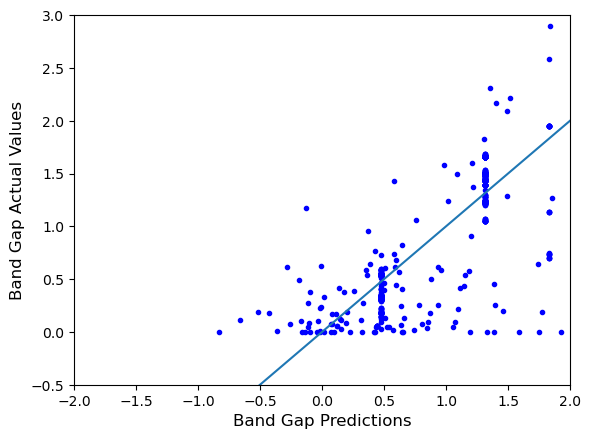

In [14]:
# plot the predicted values against the actual values
plt.plot(y_pred,y_test, 'b.')
plt.xlabel('Band Gap Predictions', fontsize = 12)
plt.ylabel('Band Gap Actual Values', rotation = 'vertical', fontsize = 12)
plt.axis([-2, 2, -0.5,3])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

In [15]:
# 5-fold cross validation
scores = cross_val_score(model, X_pca, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.57 accuracy with a standard deviation of 0.03


## Partial Least Squares Regression on Scaled Data

In [56]:
pls = PLSRegression(n_components=1)
pls.fit(X2_train,y2_train)

PLSRegression(n_components=1)

In [57]:
y_pred_pls = pls.predict(X2_test)
y_pred_pls

array([[ 0.56249054],
       [ 1.36755821],
       [ 0.56249054],
       [ 1.48234226],
       [ 1.36755821],
       [ 0.56249054],
       [ 1.36755821],
       [ 0.35712849],
       [ 0.56249054],
       [ 1.36755821],
       [ 1.36755821],
       [ 0.56249054],
       [ 1.36755821],
       [ 1.36755821],
       [ 1.36755821],
       [ 1.36755821],
       [ 1.36755821],
       [ 1.36755821],
       [ 0.56249054],
       [ 1.36755821],
       [ 0.56249054],
       [ 1.36755821],
       [ 1.36755821],
       [ 1.36755821],
       [ 0.61160889],
       [ 1.36755821],
       [ 0.56249054],
       [ 1.36755821],
       [ 1.36755821],
       [ 1.36755821],
       [ 1.36755821],
       [ 0.56249054],
       [ 1.36755821],
       [ 1.36755821],
       [ 0.56249054],
       [ 1.36755821],
       [ 1.36755821],
       [ 0.80378447],
       [-0.10196912],
       [ 1.36755821],
       [ 1.36755821],
       [ 0.56249054],
       [ 0.56249054],
       [ 1.36755821],
       [ 0.56249054],
       [ 0

In [58]:
# obtain the metrics for evaluating prediction accuracy
MAE = mean_absolute_error(y_pred_pls,y2_test)
MSE = mean_squared_error(y_pred_pls,y2_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.28807404661811253
0.22221491602141943
0.4713967713311361


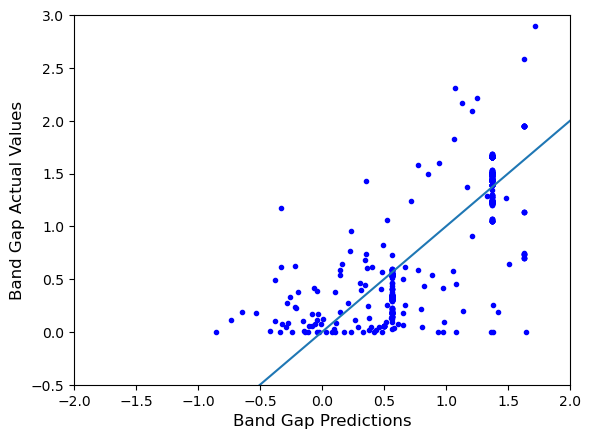

In [59]:
# plot the predicted values against the actual values
plt.plot(y_pred_pls,y_test, 'b.')
plt.xlabel('Band Gap Predictions', fontsize = 12)
plt.ylabel('Band Gap Actual Values', rotation = 'vertical', fontsize = 12)
plt.axis([-2, 2, -0.5,3])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

In [61]:
# 5-fold cross validation
scores = cross_val_score(pls, X_scaled, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.57 accuracy with a standard deviation of 0.03


## Lasso Regression with Scaling

In [62]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_scaled, y,random_state=42)

In [63]:
# using GridSearch to find the optimal alpha value for Lasso regression
parameters = {'alpha':[0.01,0.05,0.1,1,10,100]} 
model_Lasso_1 = Lasso()
Lasso_reg_1= GridSearchCV(model_Lasso_1, parameters, scoring='neg_mean_squared_error',cv=5)

In [64]:
Lasso_reg_1.fit(X3_train,y3_train)
print(Lasso_reg_1.best_estimator_)     # find the optimal alpha value

Lasso(alpha=0.01)


In [65]:
best_Lassomodel_1 = Lasso_reg_1.best_estimator_
best_Lassomodel_1.fit(X3_train,y3_train)      # train with the optimised Lasso model

Lasso(alpha=0.01)

In [66]:
y3_pred = best_Lassomodel_1.predict(X3_test)    # obtain the y prediction data
y3_pred

array([ 0.39408136,  1.43993525,  0.39408136,  1.71178936,  1.43993525,
        0.39408136,  1.43993525,  0.69545756,  0.39408136,  1.43993525,
        1.43993525,  0.39408136,  1.43993525,  1.43993525,  1.43993525,
        1.43993525,  1.43993525,  1.43993525,  0.39408136,  1.43993525,
        0.39408136,  1.43993525,  1.43993525,  1.43993525,  0.18803559,
        1.43993525,  0.39408136,  1.43993525,  1.43993525,  1.43993525,
        1.43993525,  0.39408136,  1.43993525,  1.43993525,  0.39408136,
        1.43993525,  1.43993525,  0.96578933, -0.02690949,  1.43993525,
        1.43993525,  0.39408136,  0.39408136,  1.43993525,  0.39408136,
        0.39408136,  1.43993525,  0.39408136,  0.1079122 ,  0.39408136,
        0.17621331,  1.43993525,  0.72524749,  1.43993525,  0.56565822,
       -0.11702657,  1.43993525,  0.16702207,  1.43993525,  0.39408136,
        1.43993525,  1.43993525,  0.32327517,  1.43993525,  1.43993525,
        1.43993525,  1.43993525,  1.43993525,  1.05251972,  1.43

In [67]:
MAE = mean_absolute_error(y3_pred,y3_test)
MSE = mean_squared_error(y3_pred,y3_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.22781539377761095
0.14822226530114915
0.38499644842666947


In [68]:
best_Lassomodel_1.coef_     # obtain the coefficients for all features

array([-0.00000000e+00, -1.61220496e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -4.85326557e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  6.63895888e-03,  0.00000000e+00,
       -5.22215161e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.10269533e-01, -0.00000000e+00,
        0.00000000e+00, -8.29435666e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.07127934e-01,  0.00000000e+00,  7.18765451e-02,
        0.00000000e+00,  0.00000000e+00,  1.93203567e-01, -4.99916888e-02,
        0.00000000e+00,  3.68823416e-18, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [69]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(best_Lassomodel_1.coef_,X.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
MagpieData mode Electronegativity,1.932036e-01
MagpieData range Electronegativity,7.187655e-02
MagpieData mean NfValence,5.644333e-02
MagpieData mode MendeleevNumber,6.638959e-03
MagpieData range NsValence,3.688234e-18
MagpieData avg_dev NpUnfilled,0.000000e+00
MagpieData maximum NpUnfilled,0.000000e+00
MagpieData range NpUnfilled,0.000000e+00
MagpieData mean NpUnfilled,-0.000000e+00
MagpieData maximum Number,-0.000000e+00


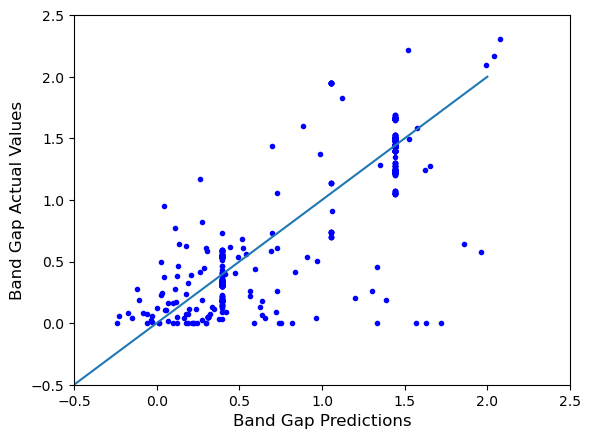

In [70]:
plt.plot(y3_pred,y3_test, 'b.')
plt.xlabel('Band Gap Predictions', fontsize = 12)
plt.ylabel('Band Gap Actual Values', rotation = 'vertical', fontsize = 12)
plt.axis([-0.5, 2.5, -0.5,2.5])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

In [72]:
# 5-fold cross validation
scores = cross_val_score(best_Lassomodel_1, X_scaled, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.02


## Lasso Regression with Reduced Dataset

In [74]:
descriptors_reduced = pd.read_csv('./descriptors_reduced.csv', delimiter = ';')
descriptors_reduced = descriptors_reduced.drop(descriptors_reduced.columns[0],axis=1)
descriptors_reduced

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,23.0,52.0,29.0,35.333332,11.111111,23.0,46.0,90.0,44.0,70.000000,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,148.33333,56.222220,64.0
1,15.0,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,...,0.000000,0.000000,0.000000,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2,31.0,33.0,2.0,32.000000,1.000000,31.0,74.0,84.0,10.0,79.000000,...,0.000000,0.000000,0.000000,0.0,64.0,166.0,102.0,115.00000,51.000000,64.0
3,17.0,31.0,14.0,21.000000,5.000000,17.0,3.0,94.0,91.0,66.250000,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,105.25000,61.875000,64.0
4,15.0,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,...,0.000000,0.000000,0.000000,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,19.0,41.0,22.0,30.333334,7.555555,19.0,3.0,74.0,71.0,41.333332,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,174.00000,73.333336,64.0
448,31.0,51.0,20.0,43.333332,8.222222,31.0,70.0,85.0,15.0,76.333336,...,0.000000,0.000000,0.000000,0.0,64.0,194.0,130.0,141.33333,51.555557,64.0
449,31.0,56.0,25.0,42.666668,8.888889,31.0,9.0,74.0,65.0,43.333332,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,174.00000,73.333336,64.0
450,4.0,31.0,27.0,18.666666,9.777778,4.0,11.0,74.0,63.0,50.666668,...,0.000006,0.000002,0.000003,0.0,64.0,194.0,130.0,150.66667,57.777780,64.0


In [75]:
dataset_reduced = pd.read_csv('dataset_reduced.csv', delimiter = ';')
dataset_reduced
band_gaps_eV = dataset_reduced["band_gap_vals_eV"]
band_gaps_eV

0      0.088699
1      1.447379
2      0.544622
3      3.400350
4      1.394320
         ...   
447    0.000000
448    0.318895
449    0.009700
450    0.005400
451    0.000000
Name: band_gap_vals_eV, Length: 452, dtype: float64

In [76]:
Xr = descriptors_reduced
yr = band_gaps_eV

In [77]:
scaler = StandardScaler()      
Xr_sd = scaler.fit_transform(Xr)
Xr_scaled = pd.DataFrame(Xr_sd, columns = Xr.columns)

In [78]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, yr,random_state=42)

In [79]:
# using GridSearch to find the optimal alpha value for Lasso regression
parameters = {'alpha':[0.01,0.05,0.1,1,10,100]} 
model_Lasso_2 = Lasso()
Lasso_reg_2= GridSearchCV(model_Lasso_2, parameters, scoring='neg_mean_squared_error',cv=5)

In [80]:
Lasso_reg_2.fit(Xr_train,yr_train)
print(Lasso_reg_2.best_estimator_)     #found the optimal alpha value

Lasso(alpha=0.01)


In [81]:
best_Lassomodel_2 = Lasso_reg_2.best_estimator_
best_Lassomodel_2.fit(Xr_train,yr_train)      #train with the optimised Lasso model

Lasso(alpha=0.01)

In [82]:
yr_pred = best_Lassomodel_2.predict(Xr_test)    # obtain the y prediction data
yr_pred

array([ 7.09227766e-01,  6.22711922e-02, -9.37396270e-03,  1.88169811e-01,
        6.47837863e-01, -3.97675111e-02,  3.80598789e-03,  5.49758785e-02,
        8.47448953e-01,  3.82411835e-01,  4.35373190e-02,  1.14566584e+00,
        1.01344935e+00,  4.12079759e-01,  4.92503440e-02,  3.82411835e-01,
       -5.75621782e-02,  2.29009553e+00,  1.16597959e+00, -1.76734029e-01,
        1.63078306e+00,  6.57758712e-01,  1.84668605e+00,  7.35312001e-01,
        3.51912512e-01,  2.42989889e+00,  2.23652081e-01,  6.32855451e-01,
        7.76039995e-01,  6.97991423e-01,  1.31076270e+00,  3.82411835e-01,
        2.13861753e+00,  1.41521036e+00,  2.37813697e-02,  6.75125524e-01,
        1.57267291e-01,  5.79884122e-01,  2.38395194e-02,  1.65615798e-01,
        1.51715501e-02,  4.53247498e-02,  5.59456660e-01,  2.71218453e-01,
        1.64802087e+00,  3.82411835e-01,  3.49886187e-01,  2.86851228e-01,
        2.97465936e-02,  4.07343838e-01,  2.14481016e-01,  5.61325599e-01,
        4.87397735e-01,  

In [83]:
MAE = mean_absolute_error(yr_pred,yr_test)
MSE = mean_squared_error(yr_pred,yr_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.4165795338381004
0.43444491682381736
0.6591243561148513


In [84]:
best_Lassomodel_2.coef_     # obtain the coefficients for all features

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.08496360e-01, -0.00000000e+00, -3.75272603e-02,  0.00000000e+00,
       -0.00000000e+00, -2.36335435e-02,  0.00000000e+00, -0.00000000e+00,
       -2.16920596e-01,  6.07143686e-02, -0.00000000e+00, -8.14256637e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -7.94851575e-02,
        1.22741535e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -9.32566765e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.68618653e-01,  3.57446876e-01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.21187016e-02, -

In [85]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(best_Lassomodel_2.coef_,Xr.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
MagpieData mode Electronegativity,0.357447
MagpieData range NUnfilled,0.275177
MagpieData mean NdUnfilled,0.212050
MagpieData avg_dev Electronegativity,0.168619
MagpieData avg_dev Column,0.122742
MagpieData minimum AtomicWeight,0.108496
MagpieData mean NfValence,0.071863
MagpieData avg_dev NsValence,0.062119
MagpieData mean MeltingT,0.060714
MagpieData avg_dev GSbandgap,0.054226


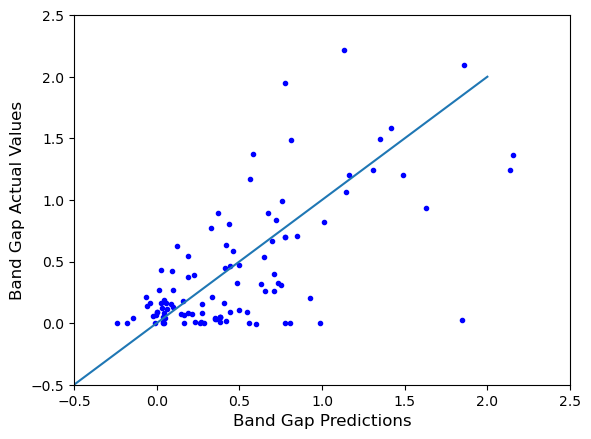

In [86]:
plt.plot(yr_pred,yr_test, 'b.')
plt.xlabel('Band Gap Predictions', fontsize = 12)
plt.ylabel('Band Gap Actual Values', rotation = 'vertical', fontsize = 12)
plt.axis([-0.5, 2.5, -0.5,2.5])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

In [88]:
# 5-fold cross validation
scores = cross_val_score(best_Lassomodel_2, Xr_scaled, yr, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.43 accuracy with a standard deviation of 0.18


## Ridge Regression

In [89]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_scaled, y,random_state=42)

In [90]:
# using GridSearch to find the optimal alpha value for Lasso regression
parameters = {'alpha':[0.01,0.05,0.1,1,10,100]} 
ridge_model = Ridge(solver = 'cholesky', random_state = 42)
ridge_reg = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error',cv=5)

In [91]:
ridge_reg.fit(X4_train,y4_train)
print(ridge_reg.best_estimator_)     #found the optimal alpha value

Ridge(alpha=10, random_state=42, solver='cholesky')


In [92]:
best_ridge = ridge_reg.best_estimator_
best_ridge.fit(X4_train,y4_train)      #train with the optimised Lasso model

Ridge(alpha=10, random_state=42, solver='cholesky')

In [93]:
y4_pred = best_ridge.predict(X4_test)    # obtain the y prediction data
y4_pred

array([ 3.86529572e-01,  1.45541278e+00,  3.86529572e-01,  1.55257904e+00,
        1.45541278e+00,  3.86529572e-01,  1.45541278e+00,  3.51655813e-01,
        3.86529572e-01,  1.45541278e+00,  1.45541278e+00,  3.86529572e-01,
        1.45541278e+00,  1.45541278e+00,  1.45541278e+00,  1.45541278e+00,
        1.45541278e+00,  1.45541278e+00,  3.86529572e-01,  1.45541278e+00,
        3.86529572e-01,  1.45541278e+00,  1.45541278e+00,  1.45541278e+00,
       -4.21502268e-01,  1.45541278e+00,  3.86529572e-01,  1.45541278e+00,
        1.45541278e+00,  1.45541278e+00,  1.45541278e+00,  3.86529572e-01,
        1.45541278e+00,  1.45541278e+00,  3.86529572e-01,  1.45541278e+00,
        1.45541278e+00,  6.10320499e-01, -1.21880205e-02,  1.45541278e+00,
        1.45541278e+00,  3.86529572e-01,  3.86529572e-01,  1.45541278e+00,
        3.86529572e-01,  3.86529572e-01,  1.45541278e+00,  3.86529572e-01,
       -6.07218503e-02,  3.86529572e-01,  5.93355853e-01,  1.45541278e+00,
        5.48190866e-01,  

In [94]:
MAE = mean_absolute_error(y4_pred,y4_test)
MSE = mean_squared_error(y4_pred,y4_test)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.21426096930196922
0.12523813546294135
0.35389000475139354


In [95]:
best_ridge.coef_     # obtain the coefficients for all features

array([ 2.57155336e-03, -3.99517181e-02,  2.20265258e-02,  2.03223738e-02,
        1.14802439e-02, -4.95041332e-02,  2.95989372e-02,  5.57082287e-02,
       -4.78861533e-02,  7.99446380e-02,  1.55116318e-01,  9.14967364e-02,
       -2.89499869e-02, -8.24895143e-02,  1.69144363e-02, -8.29710705e-03,
        6.22500532e-03, -7.22604947e-02, -1.52566400e-01, -1.44493811e-01,
        1.91408552e-01, -3.45678688e-02, -1.48618695e-01,  7.03261318e-02,
       -1.51693201e-02, -7.52528978e-02, -1.69525221e-01,  5.64497394e-02,
       -1.24118175e-01,  1.88223958e-01,  1.03445248e-01, -7.72145289e-02,
       -1.29464421e-01,  2.54619809e-02, -5.14388727e-02,  6.83194303e-02,
        9.16558756e-02,  3.86304791e-02, -4.07334883e-02, -1.29457936e-01,
       -8.93310131e-02, -1.26546405e-01, -5.07539696e-02,  2.35749070e-02,
        5.24849730e-02,  4.62583962e-02,  2.25254075e-01,  3.66029907e-02,
        0.00000000e+00, -3.66029907e-02, -4.73208127e-02,  8.06212323e-02,
        1.23534865e-02,  

In [98]:
# obtain and rank top10 feature coefficients (importance) in ascending order
coeff_df = pd.DataFrame(best_ridge.coef_,X.columns,columns=['Coefficient'])
coeff_descending = coeff_df.sort_values('Coefficient', ascending=[0])
coeff_descending.head(10)

,Coefficient
MagpieData avg_dev NpValence,0.225470
MagpieData mode Electronegativity,0.225254
MagpieData avg_dev GSvolume_pa,0.218592
MagpieData avg_dev GSbandgap,0.207926
MagpieData mean NfValence,0.202383
MagpieData mean NdUnfilled,0.196734
MagpieData mean MeltingT,0.191409
MagpieData minimum Row,0.188224
MagpieData mean NUnfilled,0.177460
MagpieData mean GSbandgap,0.172217


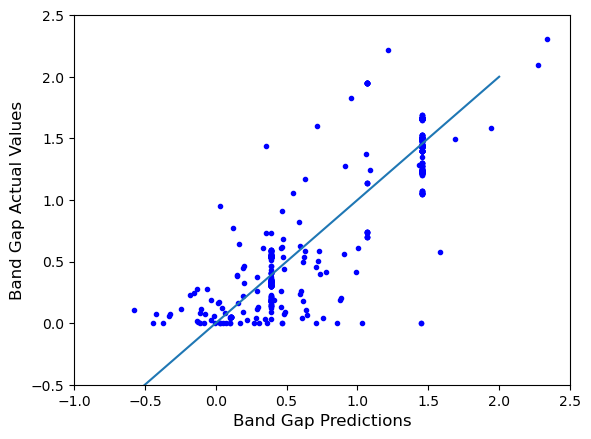

In [97]:
plt.plot(y4_pred,y4_test, 'b.')
plt.xlabel('Band Gap Predictions', fontsize = 12)
plt.ylabel('Band Gap Actual Values', rotation = 'vertical', fontsize = 12)
plt.axis([-1, 2.5, -0.5,2.5])
ident = [-6, 2]
plt.plot(ident,ident)
plt.show()

In [100]:
# 5-fold cross validation
scores = cross_val_score(best_ridge, X_scaled, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.04
